Data generation complete and saved to student_data.csv


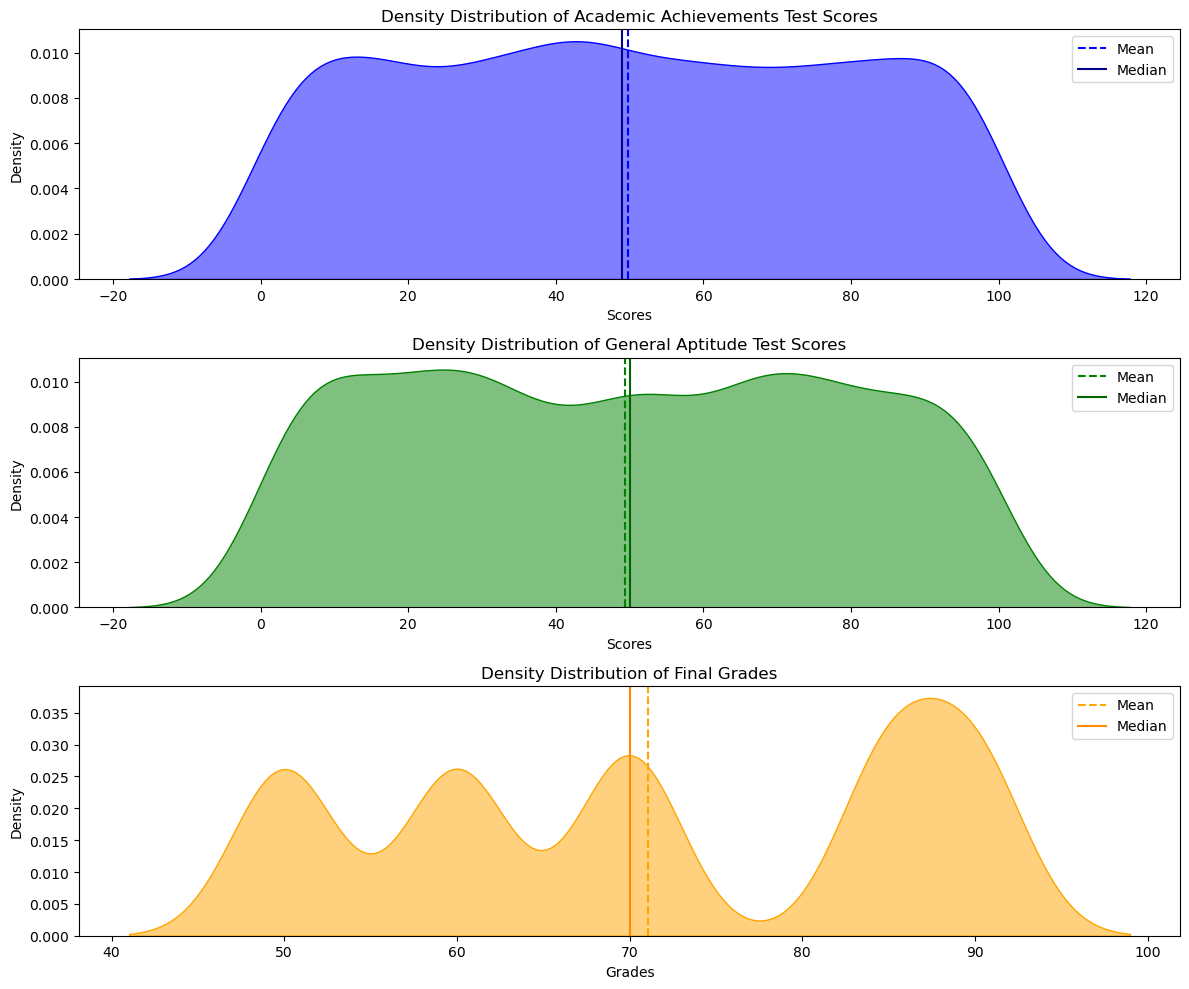

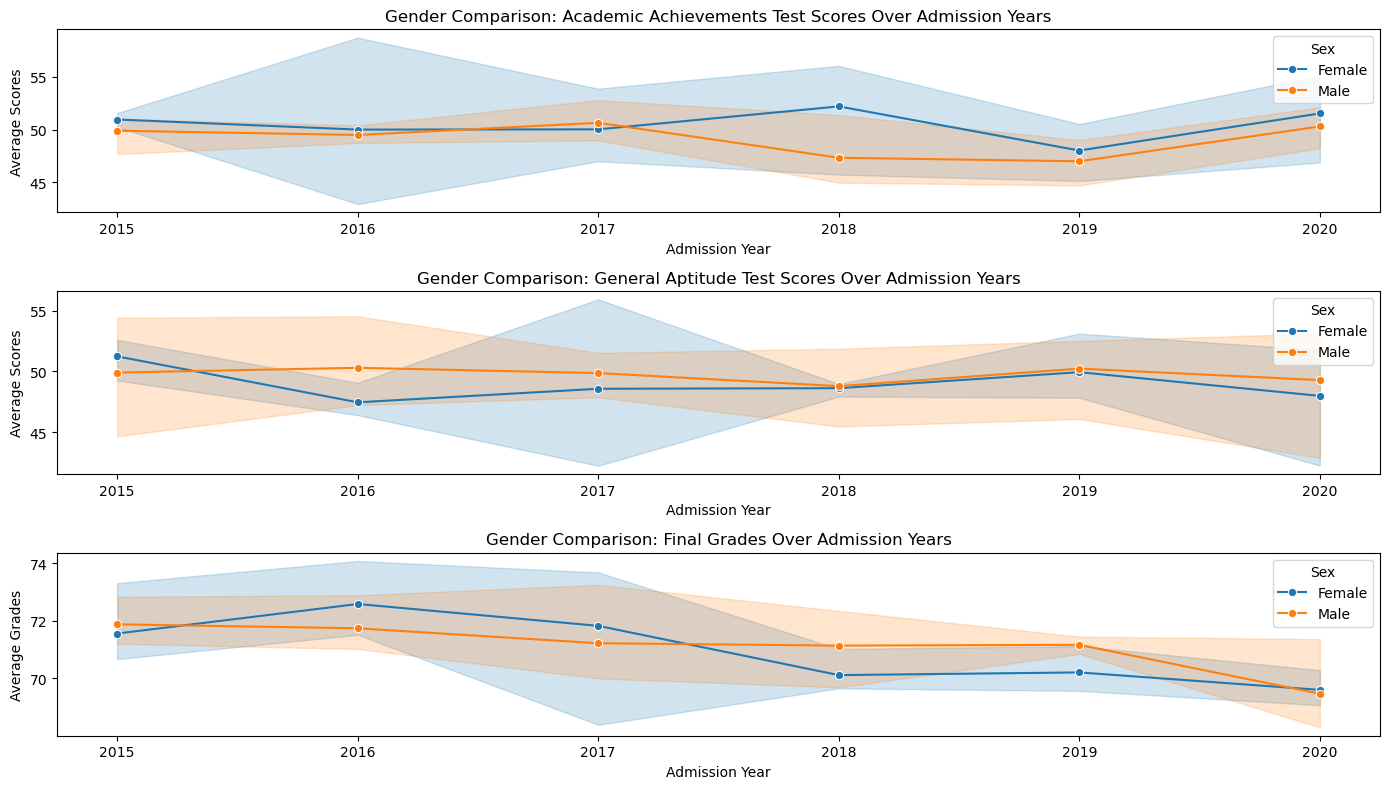

           Model  Precision    Recall  F1 Score  Accuracy
0  Random Forest   0.488889  0.536585  0.511628  0.510000
1            SVM   0.472492  0.508711  0.489933  0.493333
2    Naive Bayes   0.484375  0.540070  0.510708  0.505000


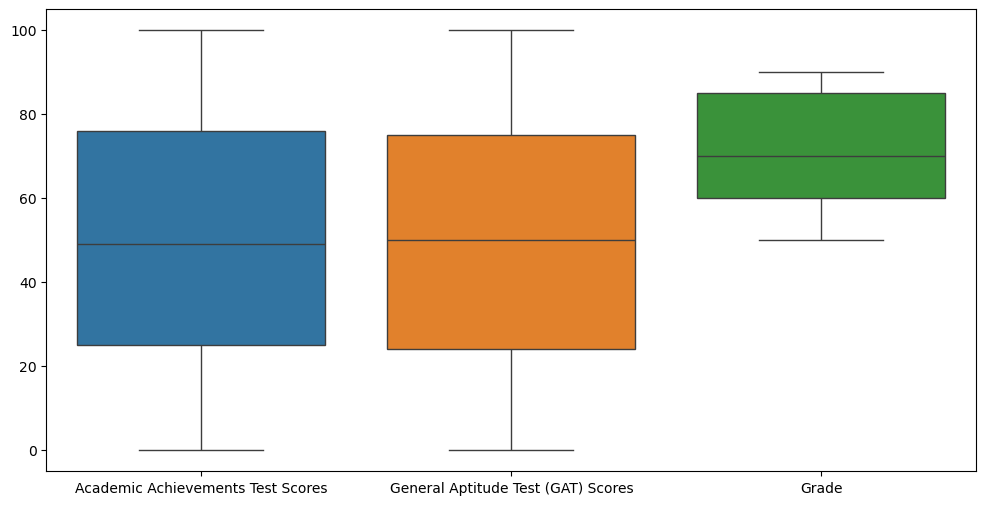

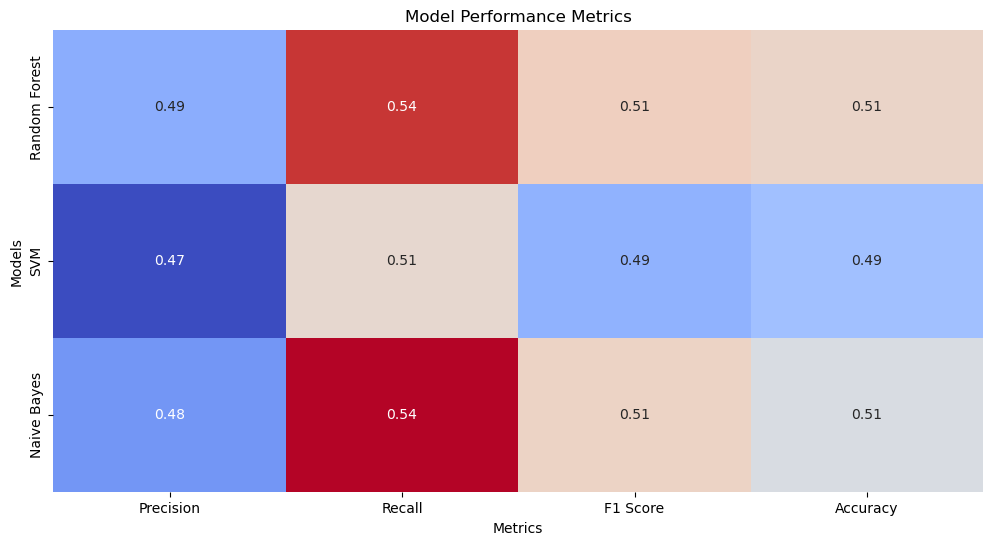

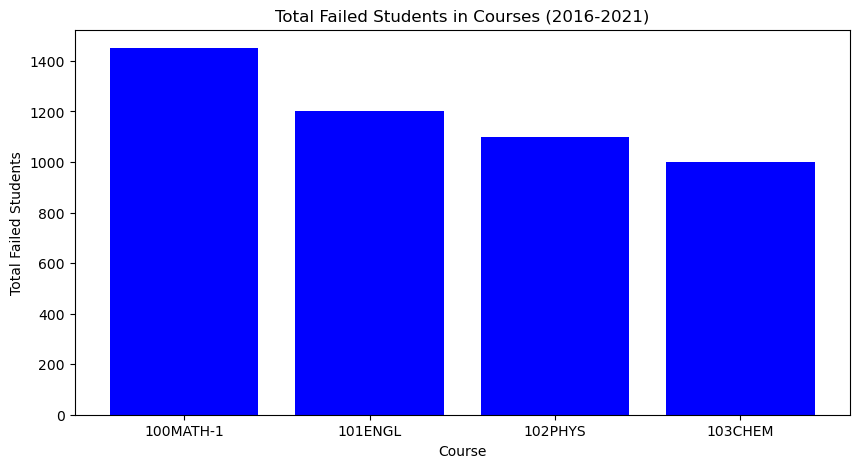

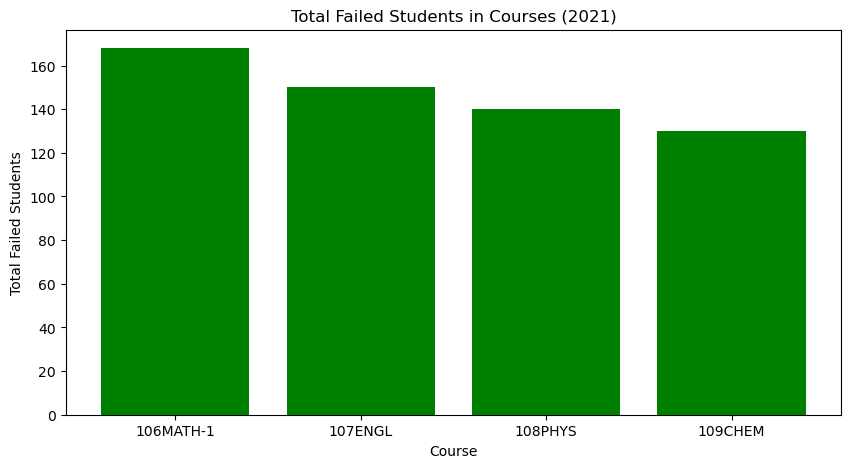

<function networkx.drawing.nx_pylab.draw_networkx_edge_labels(G, pos, edge_labels=None, label_pos=0.5, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal', alpha=None, bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, rotate=True, clip_on=True)>

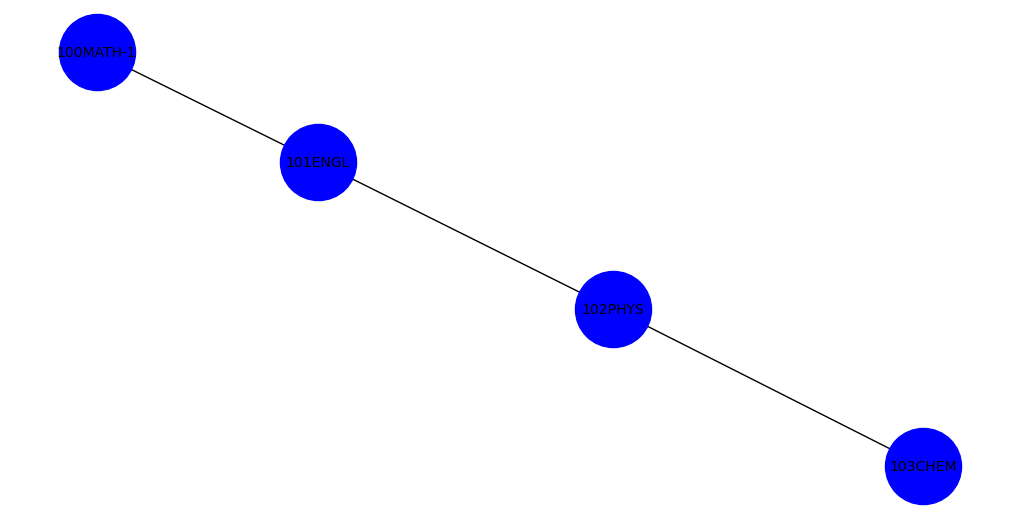

In [5]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def generate_student_data(num_students):
    students = []
    programs = ["CS", "IT", "CNET"]
    course_names = ["Course1", "Course2", "Course3"]
    grades = [85, 90, 70, 60, 50]
    criteria = ["Entrance Exam", "Merit-based", "Sports Quota"]

    for i in range(num_students):
        gpa = round(random.uniform(2.0, 10.0), 2)  # GPA on a 10-point scale
        performance = 1 if gpa >= 6 else 0  # Assuming a GPA >= 6 is good performance
        student = {
            "Student ID": i + 1,
            "Sex": random.choice(["Male", "Female"]),
            "Campus name": random.choice(["Campus A", "Campus B", "Campus C"]),
            "Name of the course": random.choice(course_names),
            "Course level": random.randint(100, 400),
            "Section number": random.randint(1, 10),
            "Lecturer ID": random.randint(100, 500),
            "Semester year": f"{random.randint(2021, 2025)}-{random.randint(1, 3)}",
            "Major": random.choice(programs),
            "Grade": random.choice(grades),
            "Student status": random.choice(["regular", "graduate", "discontinuous"]),
            "Admission year": f"{random.randint(2015, 2020)}-{random.randint(1, 3)}",
            "Graduate year": f"{random.randint(2021, 2025)}-{random.randint(1, 3)}",
            "Expected graduate year": f"{random.randint(2021, 2025)}-{random.randint(1, 3)}",
            "Secondary school GPA": round(random.uniform(0.0, 100.0), 2),
            "General Aptitude Test (GAT) Scores": random.randint(0, 100),
            "Academic Achievements Test Scores": random.randint(0, 100),
            "School name": random.choice(["School A", "School B", "School C"]),
            "Student GPA": round(random.uniform(0.0, 4.0), 2),
            "Student semester GPA": round(random.uniform(0.0, 4.0), 2),
            "Performance": performance,
            "Admission Criteria": random.choice(criteria)
        }
        students.append(student)
    return students

# Generate 3000 students
data = generate_student_data(3000)

# Export to CSV
df = pd.DataFrame(data)
df.to_csv("student_data1.csv", index=False)

print("Data generation complete and saved to student_data.csv")

# Load the dataset
data = pd.read_csv('student_data1.csv')

# 1. Density Distribution Functions
plt.figure(figsize=(12, 10))

# Academic Achievements Test Scores
plt.subplot(3, 1, 1)
sns.kdeplot(data['Academic Achievements Test Scores'], fill=True, color='blue', alpha=0.5)
plt.axvline(data['Academic Achievements Test Scores'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(data['Academic Achievements Test Scores'].median(), color='darkblue', linestyle='-', label='Median')
plt.title('Density Distribution of Academic Achievements Test Scores')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()

# General Aptitude Test Scores
plt.subplot(3, 1, 2)
sns.kdeplot(data['General Aptitude Test (GAT) Scores'], fill=True, color='green', alpha=0.5)
plt.axvline(data['General Aptitude Test (GAT) Scores'].mean(), color='green', linestyle='--', label='Mean')
plt.axvline(data['General Aptitude Test (GAT) Scores'].median(), color='darkgreen', linestyle='-', label='Median')
plt.title('Density Distribution of General Aptitude Test Scores')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()

# Final Grades
plt.subplot(3, 1, 3)
sns.kdeplot(data['Grade'], fill=True, color='orange', alpha=0.5)
plt.axvline(data['Grade'].mean(), color='orange', linestyle='--', label='Mean')
plt.axvline(data['Grade'].median(), color='darkorange', linestyle='-', label='Median')
plt.title('Density Distribution of Final Grades')
plt.xlabel('Grades')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Gender Comparison in Admission Criteria
# Extracting admission year and term
data['Admission Year'] = data['Admission year'].str.split('-').str[0]
data['Term'] = data['Admission year'].str.split('-').str[1]

# Grouping by admission year and term
gender_comparison = data.groupby(['Admission Year', 'Term', 'Sex']).agg({
    'Academic Achievements Test Scores': 'mean',
    'General Aptitude Test (GAT) Scores': 'mean',
    'Grade': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))

# Academic Achievements Test Scores
plt.subplot(3, 1, 1)
sns.lineplot(data=gender_comparison, x='Admission Year', y='Academic Achievements Test Scores', hue='Sex', marker='o')
plt.title('Gender Comparison: Academic Achievements Test Scores Over Admission Years')
plt.xlabel('Admission Year')
plt.ylabel('Average Scores')

# General Aptitude Test Scores
plt.subplot(3, 1, 2)
sns.lineplot(data=gender_comparison, x='Admission Year', y='General Aptitude Test (GAT) Scores', hue='Sex', marker='o')
plt.title('Gender Comparison: General Aptitude Test Scores Over Admission Years')
plt.xlabel('Admission Year')
plt.ylabel('Average Scores')

# Final Grades
plt.subplot(3, 1, 3)
sns.lineplot(data=gender_comparison, x='Admission Year', y='Grade', hue='Sex', marker='o')
plt.title('Gender Comparison: Final Grades Over Admission Years')
plt.xlabel('Admission Year')
plt.ylabel('Average Grades')

plt.tight_layout()
plt.show()

# 3. Admission Scores Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Academic Achievements Test Scores', 'General Aptitude Test (GAT) Scores', 'Grade']])

# Pre-processing
X = data.drop('Performance', axis=1)
y = data['Performance']

# Categorical and numerical features
categorical_features = ['Sex', 'Campus name', 'Name of the course', 'Major', 'Student status', 'Admission Criteria', 'School name']
numerical_features = X.select_dtypes(include=[int, float]).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# List of models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train models and collect performance metrics
performance_metrics = []

for model_name, model in models.items():
    # Create a pipeline that first transforms the data and then fits the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Collect metrics
    metrics = {
        "Model": model_name,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Accuracy": accuracy_score(y_test, y_pred)
    }
    performance_metrics.append(metrics)

# Convert performance metrics to DataFrame for display
performance_df = pd.DataFrame(performance_metrics)
print(performance_df)

# Visualization 1: Heatmap of Performance Metrics
plt.figure(figsize=(12, 6))
sns.heatmap(performance_df.set_index("Model"), annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title("Model Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()

# Additional Analysis: Total Failed Students
# Sample data for total failed students
data_2016_2021 = {
    "Course": ["100MATH-1", "101ENGL", "102PHYS", "103CHEM"],
    "Failed_Students": [1451, 1200, 1100, 1000]
}

data_2021 = {
    "Course": ["106MATH-1", "107ENGL", "108PHYS", "109CHEM"],
    "Failed_Students": [168, 150, 140, 130]
}

# Create dataframes
df_2016_2021 = pd.DataFrame(data_2016_2021)
df_2021 = pd.DataFrame(data_2021)

# Bar chart for 2016-2021
plt.figure(figsize=(10, 5))
plt.bar(df_2016_2021["Course"], df_2016_2021["Failed_Students"], color='blue')
plt.title("Total Failed Students in Courses (2016-2021)")
plt.xlabel("Course")
plt.ylabel("Total Failed Students")
plt.show()

# Bar chart for 2021
plt.figure(figsize=(10, 5))
plt.bar(df_2021["Course"], df_2021["Failed_Students"], color='green')
plt.title("Total Failed Students in Courses (2021)")
plt.xlabel("Course")
plt.ylabel("Total Failed Students")
plt.show()

# Sample data for Jaccard similarity network
edges_2016_2021 = [
    ("100MATH-1", "101ENGL", 0.5),
    ("101ENGL", "102PHYS", 0.3),
    ("102PHYS", "103CHEM", 0.2)
]

edges_2021 = [
    ("106MATH-1", "107ENGL", 0.6),
    ("107ENGL", "108PHYS", 0.4),
    ("108PHYS", "109CHEM", 0.3)
]

# Create network graph for 2016-2021
G_2016_2021 = nx.Graph()
for edge in edges_2016_2021:
    G_2016_2021.add_edge(edge[0], edge[1], weight=edge[2])

# Draw network graph for 2016-2021
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(G_2016_2021)
nx.draw(G_2016_2021, pos, with_labels=True, node_color='blue', edge_color='black', node_size=3000, font_size=10)
labels = nx.get_edge_attributes(G_2016_2021, 'weight')
nx.draw_networkx_edge_labels